In [1]:
import os
import re
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
working_dir = "/om2/user/ckauf/.result_caching/neural_nlp.score"

In [3]:
filename='benchmark=Pereira2018-encoding,model=constant-units,subsample=None.pkl'

In [4]:
file = os.path.join(working_dir,filename)
with open(file, 'rb') as f:
    out = pickle.load(f)
result = out['data'].values

Loading lookup from /om2/user/ckauf/anaconda/envs/perturbedenv/lib/python3.6/site-packages/brainio_collection/lookup.csv


## Investigate score object and store raw scores ##

In [5]:
result

array([[nan,  0.]])

In [6]:
s = out['data']
s

<xarray.Score (layer: 1, aggregation: 2)>
array([[nan,  0.]])
Coordinates:
  * aggregation  (aggregation) <U6 'center' 'error'
  * layer        (layer) <U14 'constant-units'
Attributes:
    raw:          <xarray.Score (layer: 1, aggregation: 2)>\narray([[nan,  0....
    ceiling:      <xarray.Score (aggregation: 3)>\narray([0.318567, 0.012958,...
    description:  ceiling-normalized score
    model:        constant-units
    benchmark:    Pereira2018-encoding

In [7]:
lang_raw = s.raw.raw # contains raw scores across layers, for each neuroid
lang_raw

<xarray.Score (layer: 1, neuroid: 13517)>
array([[nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '018' '018' '018'
  - voxel_num        (neuroid) int64 28 29 31 32 38 42 ... 152 153 154 159 160
  - filter_strategy  (neuroid) object '' '' '' '' '' '' '' ... '' '' '' '' '' ''
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'LH_AntTemp' 'LH_AntTemp' ... 'LH_AntTemp'
  - indices_in_3d    (neuroid) int64 72505 72506 72584 ... 87754 87831 87832
  - col_to_coord_1   (neuroid) int64 62 63 62 63 63 63 63 ... 65 62 63 64 62 63
  - col_to_coord_2   (neuroid) int64 63 63 64 64 65 66 63 ... 65 66 66 66 67 67
  - col_to_coord_3   (neuroid) int64 10 10 10 10 10 10 11 ... 12 12 12 12 12 12
  - neuroid_id       (neuroid) object '018.28' '018.29' ... '018.159' '018.160'
  * layer            (layer) <U14 'constant-units'
Attributes:

In [8]:
all_raw = s.raw.raw.raw # contains scores for all neuroids, across all layers, across expts and splits
all_raw

<xarray.Score (layer: 1, experiment: 2, split: 5, neuroid: 102880)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]])
Coordinates:
  * experiment       (experiment) object '243sentences' '384sentences'
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '018' '018' '018'
  - voxel_num        (neuroid) int64 28 29 31 32 38 42 ... 152 153 154 159 160
  - filter_strategy  (neuroid) object '' '' '' '' '' '' '' ... '' '' '' '' '' ''
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'LH_AntTemp' 'LH_AntTemp' ... 'LH_AntTemp'
  - indices_in_3d    (neuroid) int64 72505 72506 72584 ... 87754 87831 87832
  - col_to_coord_1   (neuroid) int64 62 63 62 63 63 63 63 ... 65 62 63 64 62 63
  - col_to_coord_2   (neuroid) int64 63 63 64 64 65 66 63 ... 65 66 66 66 67 67
  - col_to_coord_3   (neuroid) in

Investigate the scores for language (already meaned across splits and expt)

In [9]:
lang_raw.shape

(1, 13517)

## Scatter plot of raw language scores across layers

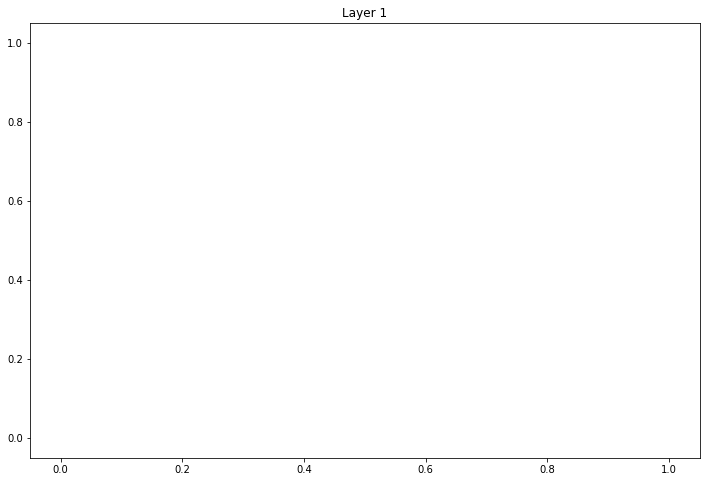

In [10]:
# plot across layers
for l in range(lang_raw.shape[0]):
    plt.figure(figsize=(12,8))
    plt.plot(lang_raw.values[l,:])
    plt.title(f'Layer {l+1}')

## Histogram of raw language scores across layers

/om2/user/ckauf/anaconda/envs/perturbedenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/om2/user/ckauf/anaconda/envs/perturbedenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

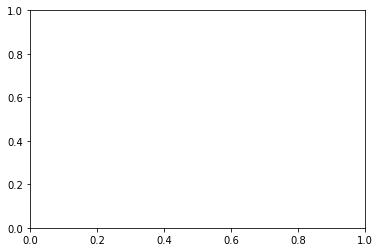

In [11]:
# plot across layers
for l in range(lang_raw.shape[0]):
    plt.figure(figsize=(6,4))
    plt.hist(lang_raw.values[l,:],bins=250)
    plt.xlim([-0.7,0.7])
    plt.title(f'Raw predictivity (r) score across all language voxels:\nLayer {l+1}')

## Investigate various groupings to provide a final score

In [ ]:
# perform grouping:
lang_raw.loc[lang_raw.layer == 'encoder.h.5'].groupby('subject').median().median()


Divide by (approximate) ceiling

In [ ]:
0.105633/0.32 # matches with the final score reported in the 'result'

How does the score change by mean operations?

In [ ]:
lang_raw.loc[lang_raw.layer == 'encoder.h.5'].groupby('subject').mean().median()

In [ ]:
lang_raw.loc[lang_raw.layer == 'encoder.h.5'].groupby('subject').mean().mean()

In [ ]:
lang_raw.loc[lang_raw.layer == 'encoder.h.5'].groupby('subject').median().mean()

It actually increases :) i.e. we seem to take the most conservative estimate (in this very particular case)

Obtain neuroids across splits and expt for just lang voxels

In [ ]:
all_raw.loc[all_raw.layer == 'encoder.h.5'].squeeze()

In [ ]:
all_raw.loc[all_raw.layer == 'encoder.h.5'].squeeze().groupby('experiment').mean() # similar scores across expts

How is the score affected by taking the MEAN across CV splits? OBS this analysis is across ALL neuroids, not only lang

In [ ]:
all_raw.loc[all_raw.layer == 'encoder.h.5'].squeeze().groupby('split').mean()

In [ ]:
all_raw.loc[all_raw.layer == 'encoder.h.5'].squeeze().groupby('split').median()

In [ ]:
x = all_raw.loc[all_raw.layer == 'encoder.h.5'].squeeze()

In [ ]:
x

Test taking mean over experiment or median over experiment

In [12]:
x.mean(dim='experiment').T.loc[x.atlas == 'language'].groupby('subject').median().median()

NameError: name 'x' is not defined

In [ ]:
x.median(dim='experiment').T.loc[x.atlas == 'language'].groupby('subject').median().median()

Score does not change. Using mean across subjects:

In [ ]:
x.median(dim='experiment').T.loc[x.atlas == 'language'].groupby('subject').mean().mean()

In [ ]:
x.mean(dim='experiment').T.loc[x.atlas == 'language'].groupby('subject').mean().mean()

In [ ]:
x.mean(dim='experiment')

In [ ]:
(x.median(dim='experiment') == x.mean(dim='experiment')).all()

In [ ]:
np.sum(x.median(dim='experiment').values == x.mean(dim='experiment').values)

In [ ]:
x.median(dim='experiment').values

In [ ]:
x.mean(dim='experiment').values

In [ ]:
514305 / (102880*5)

I.e. it is always the same to take mean/median over experiment?

In [ ]:
x

In [ ]:
x.shape

In [ ]:
x.experiment

In [ ]:
x.loc[x.experiment=='243sentences']

In [ ]:
x.loc[x.experiment=='384sentences']

Wow I think it's because taking the mean or median over an axis of size two is the same.. omg :)